In [4]:
import MDAnalysis as mda
import MDAnalysisData.datasets
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from MDAnalysis.analysis import rdf
from MDAnalysis.analysis.distances import distance_array
import nglview as nv

In [6]:
print(mda.__version__)
print(MDAnalysisData.__version__)

2.8.0
0.9.0


In [7]:
import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

In [8]:
TPR = 'md_0_temp_mdsim_500ns.tpr'
XTC = 'md_0_temp_mdsim_500ns_pbc_center.xtc'




In [9]:
# Load the trajectory and topology
u = mda.Universe(TPR, XTC)


FileNotFoundError: [Errno 2] No such file or directory: 'md_0_temp_mdsim_500ns.tpr'

In [ ]:
u.trajectory

<XTCReader md_0_temp_mdsim_500ns_pbc_center.xtc with 10001 frames of 40647 atoms>

In [ ]:
trp = u.select_atoms("resname TRP")
print(u.select_atoms("resname TRP"))

<AtomGroup [<Atom 1: C1 of type cc of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 2: N1 of type na of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 3: C2 of type ca of resname TRP, resid 1 and segid seg_0_TRP>, ..., <Atom 646: H10 of type hn of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 647: H11 of type hn of resname TRP, resid 24 and segid seg_0_TRP>, <Atom 648: H12 of type hn of resname TRP, resid 24 and segid seg_0_TRP>]>


In [ ]:
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
print(trp_coms.shape)

(24, 3)


In [ ]:
#com_atoms = trp.select_atoms("name C2")
com_atoms = trp.select_atoms("resname TRP and name C8")
print(len(com_atoms))
print(com_atoms)
print(com_atoms.n_atoms)

24
<AtomGroup [<Atom 9: C8 of type cd of resname TRP, resid 1 and segid seg_0_TRP>, <Atom 36: C8 of type cd of resname TRP, resid 2 and segid seg_0_TRP>, <Atom 63: C8 of type cd of resname TRP, resid 3 and segid seg_0_TRP>, ..., <Atom 576: C8 of type cd of resname TRP, resid 22 and segid seg_0_TRP>, <Atom 603: C8 of type cd of resname TRP, resid 23 and segid seg_0_TRP>, <Atom 630: C8 of type cd of resname TRP, resid 24 and segid seg_0_TRP>]>
24


In [ ]:
com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")

In [ ]:
class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, trp, atomname):
        self.trp = trp
        self.com_atoms = trp.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.trp.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts
                                              

In [ ]:
#com_atoms = ucom.select_atoms("name C2")
comRDF = rdf.InterRDF(com_atoms, com_atoms, 
                      nbins=1000,range=(0, 25), exclusion_block=(1, 1)).run(verbose=True)





  0%|          | 0/10001 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


(0.0, 8.0)

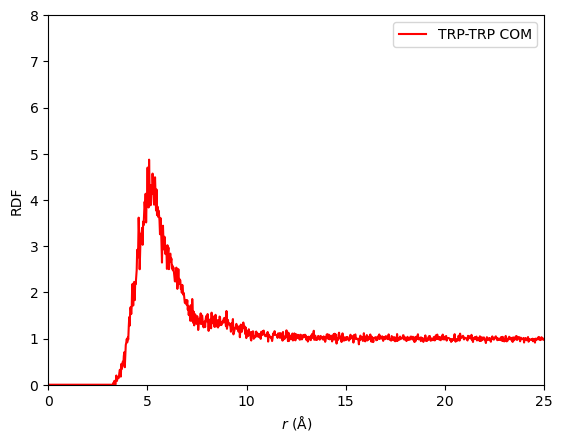

In [ ]:

plt.plot(comRDF.bins, comRDF.rdf, label="TRP-TRP COM", color="red")
plt.xlabel(r"$r$ (Å)")
plt.ylabel("RDF")
plt.legend(loc="best");
plt.xlim(0,25)
plt.ylim(0,8)

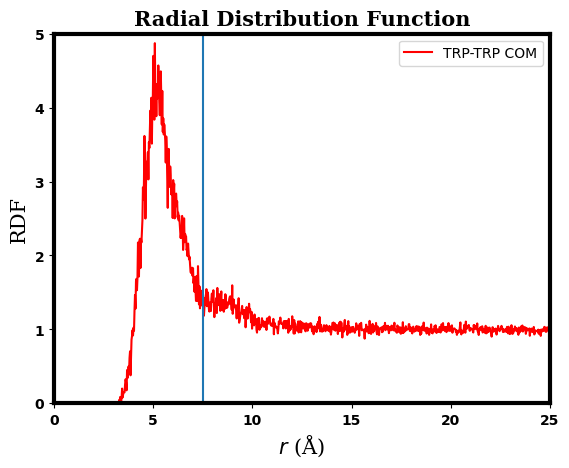

In [ ]:
#font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function',fontdict= font1,fontweight='bold')

plt.plot(comRDF.bins, comRDF.rdf, label="TRP-TRP COM",color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel("RDF",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.xlim(0,25)
plt.ylim(0,5)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.axvline(7.5)
# plt.savefig('rdf_trp75mM_trp-trp_com.png',dpi= 2000) # Other extensions: png, svg
plt.grid(False)
plt.show()


[[22.58607204 21.71122177 48.76798159]
 [49.59406955 62.48992166  1.76141987]
 [30.21082471  3.70867147 21.00035079]
 [40.11861247 31.67040627 65.52363099]
 [39.22258781 56.46087167 66.91160821]
 [ 0.94466558  7.46176426 57.71898442]
 [54.99187752 27.87940191 22.86396598]
 [25.13832682 19.73289338 31.43398361]
 [73.61568335 20.28270033 73.66471853]
 [65.2217422  44.86564624 62.35432088]
 [41.39926063 61.34500477 66.27279918]
 [27.4789708  24.54733887 31.04822157]
 [15.45444968 11.03803621 71.03008969]
 [47.5817085  21.71303913 51.96938018]
 [14.34270031 21.54290615 67.1022519 ]
 [54.38595952 29.36626895 27.14346471]
 [24.12350108 45.39477505  3.52768682]
 [29.65290005 61.83450965  3.08930033]
 [27.192371   28.93351238 27.92630708]
 [60.41145169 20.84377109 14.28925713]
 [64.96946556 12.99425428 29.14614351]
 [47.05194353  7.94314659  5.78221414]
 [16.08829739 43.76369775 13.39411436]]


/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


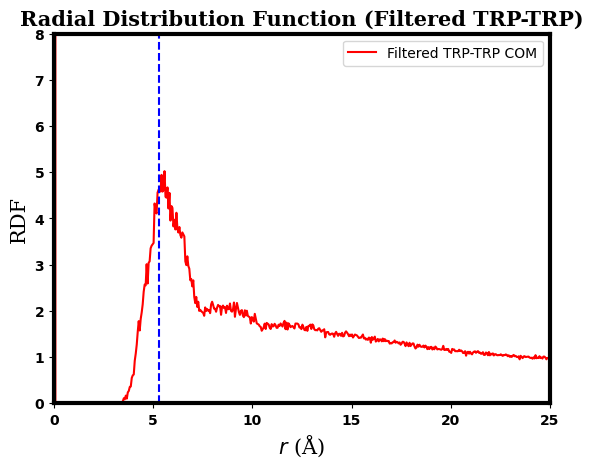

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)
TPR = 'md_0_sim_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_24trp-1ta_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname ta")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")

# Define a class to replace TRP and TA positions with their COM
class ReplaceWithCOM:
    def __init__(self, molecule, atomname):
        self.molecule = molecule
        self.com_atoms = molecule.select_atoms(f"name {atomname}")
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.molecule.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts

# Replace positions with COM
trp_com_atoms = trp.select_atoms("resname TRP and name C8")
# ta_com_atoms = ta.select_atoms("resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)")
ta_com_atoms = ta.select_atoms("resname ta and name C3")

trp_com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
ta_com_atoms.positions = ta.center_of_mass(unwrap=True, compound="fragments")

# Calculate RDF between TA and TRP with a 6 Å cutoff
rdf_ta_trp = rdf.InterRDF(ta_com_atoms, trp_com_atoms, nbins=1000, range=(0, 25)).run()

# Find TRP pairs that are outside the 6 Å cutoff distance from any TA
trp_indices_to_include = []

for i, trp_com in enumerate(trp_coms):
    ta_distances = np.linalg.norm(ta_coms - trp_com, axis=1)
    if np.all(ta_distances >= 12.0):
        trp_indices_to_include.append(i)

# Select only TRP atoms that are not within 6 Å of TA
trp_coms_filtered = trp_coms[trp_indices_to_include]
print(trp_coms_filtered)
# Calculate RDF for the filtered TRP-TRP interactions
rdf_trp_trp_filtered = rdf.InterRDF(trp_com_atoms[trp_indices_to_include], 
                                    trp_com_atoms[trp_indices_to_include], 
                                    nbins=600, range=(0, 30)).run()

# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')

plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="Filtered TRP-TRP COM", color='red')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=5.3, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()


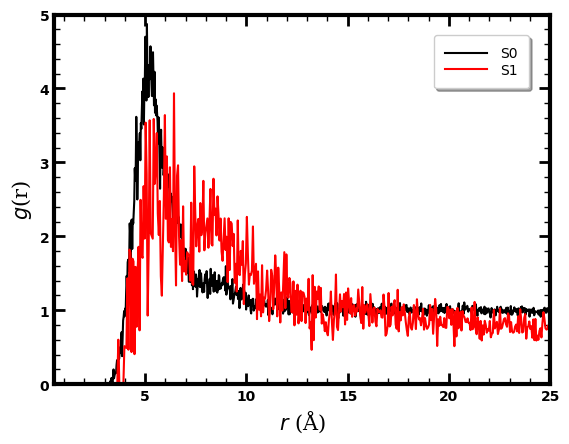

In [ ]:
#font1 = {'family': 'serif': ['Times New Roman'], 'size'f 10}
font1 = {'family':'serif','color':'black','size':15}

plt.plot(comRDF.bins, comRDF.rdf, label="S0",color='black')
plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="S1", color='red')
plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)


plt.xlim(0.5,25)
plt.ylim(0,5)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis='x', which='major', direction='in', length=8, width=2, color='black')
plt.tick_params(axis='y', which='major', direction='in', length=8, width=2, color='black')
plt.gca().tick_params(axis='both', which='minor', color='black', width=1, length=4, bottom=True, top=True, left=True, right=True, direction='in')
plt.minorticks_on()
plt.legend(loc="upper right", labelspacing=0.2, handlelength=3.0, handletextpad=1.0, borderaxespad=1.5, borderpad=0.8, fontsize=10, fancybox=True, shadow=True)
plt.savefig('rdf_all_sys.png',dpi= 1000) # Other extensions: png, svg
plt.grid(False)
plt.show()


In [ ]:
TPR = 'md_0_sim_24trp-8sbt_500ns.tpr'
XTC = 'md_0_sim_24trp-8sbt_500ns_pbc_center.xtc'

